In [9]:
%matplotlib inline
import numpy as np
import neuralnet as nn
import pylab as p
from sklearn.cross_validation import train_test_split

In [5]:
# load data and split into train, val (test is submitting)
data = np.load("C:\\DataSets\\otto\dumps\\train_data")
labels = np.load("C:\\DataSets\\otto\\dumps\\train_labels")

tr_x, val_x, tr_y, val_y = train_test_split(data, labels, test_size=0.15, random_state=21)

In [6]:
# data transformation

# log transformation
tr_x = np.log10(tr_x + 1)
val_x = np.log10(val_x + 1)

# normalisation  (xi - mu) / sigma over all values
# get averages
avg = np.mean(tr_x)
sds = np.std(tr_x)

tr_x -= avg
tr_x /= sds

val_x -= avg
val_x /= avg

In [7]:
network = nn.ann_2(features=93, hl1_size=100, hl2_size=100, classes=9)
network.set_hyperparams(epochs=100, batch_size=100)
tr = network.train(tr_x, tr_y)
# should add some message to indicate training has completed

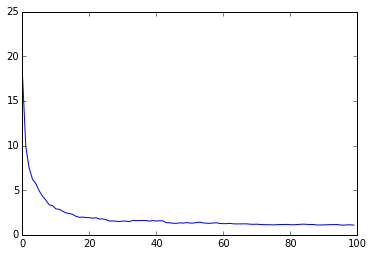

In [10]:
p.plot(tr["epoch"], tr["cost"])

In [13]:
print(network.accuracy(val_x, val_y))
print(network.cross_entropy(val_x, val_y))

0.700280112045
1.24625737736
